In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading csv file
df = pd.read_csv("day.csv")

In [3]:
# Displaying first 5 records of the dataset
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Checking number of rows and columns in the dataset
df.shape

(730, 16)

In [5]:
# Checking datatypes of each column in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# Checking for any null/missing values in the dataset
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
# Summary of all numerical columns in the dataset
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
# We can clearly see that instant is an index column so dropping this column
df.drop(['instant'], axis=1, inplace=True)
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
# From the data dictionary we know that cnt = casual + registered. Since our target variable is cnt, dropping columns
# casual and registered.
df.drop(['casual', 'registered'], axis=1, inplace=True)
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [10]:
# Dropping `dteday` as it is just the date format of the columns `weekday`-`mnth`-`yr`
df.drop(['dteday'], axis=1, inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [11]:
# Renaming the columns for better understanding
df.rename(columns = {'yr':'year','mnth':'month', 'atemp':'feelingtemp', 'hum':'humidity','cnt':'count'}, inplace = True) 
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,feelingtemp,humidity,windspeed,count
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [12]:
# Replacing categorical variables with their corresponding values referring to the data dictionary
df['season'] = df.season.map({1: 'spring', 2: 'summer', 3:'fall', 4:'winter'})
df['month'] = df.month.map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'June', 7:'July', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})
df['weathersit'] = df.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Heavy Rain + Ice Pallets + Thunderstorm + Mist'})
df['weekday'] = df.weekday.map({0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'})

df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,feelingtemp,humidity,windspeed,count
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


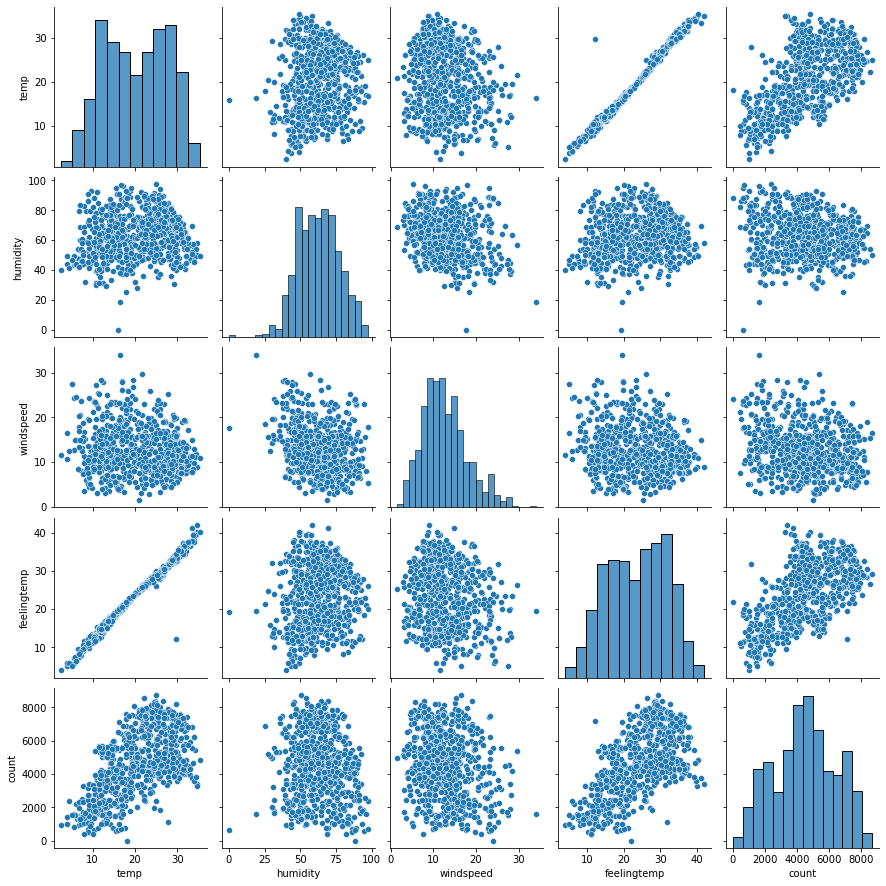

In [13]:
# Visualise pairplot for numerical variables
sns.pairplot(df, vars=["temp", "humidity", "windspeed", "feelingtemp", "count"])
plt.show()

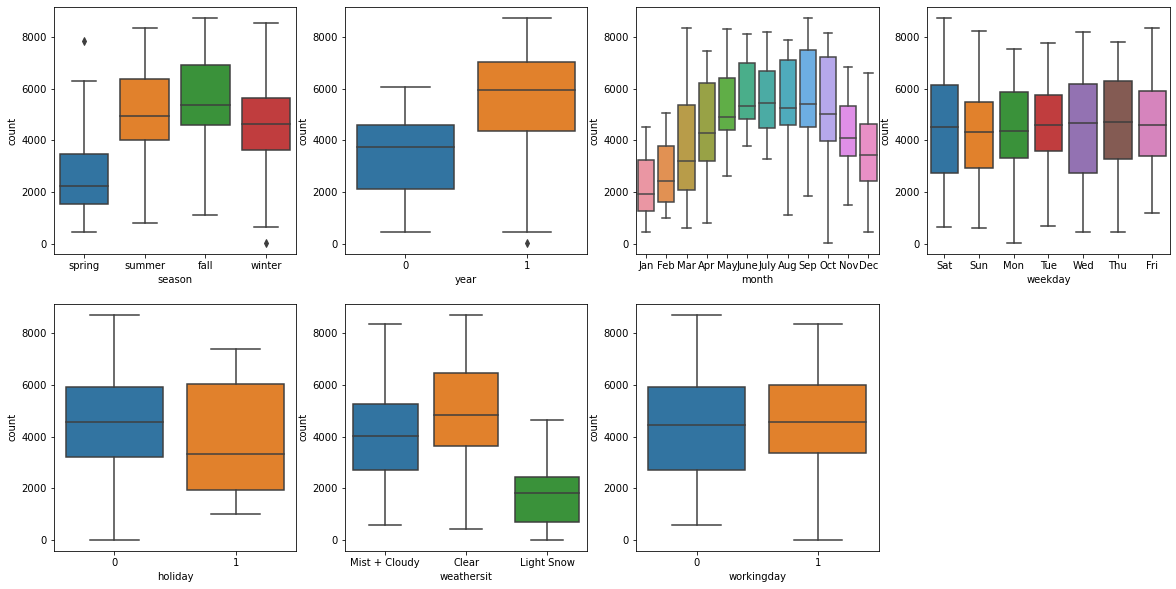

In [14]:
plt.figure(figsize=(20, 10))

plt.subplot(2, 4, 1)
sns.boxplot(x = 'season', y = 'count', data = df)
plt.subplot(2, 4, 2)
sns.boxplot(x = 'year', y = 'count', data = df)
plt.subplot(2, 4, 3)
sns.boxplot(x = 'month', y = 'count', data = df)
plt.subplot(2, 4, 4)
sns.boxplot(x = 'weekday', y = 'count', data = df)
plt.subplot(2, 4, 5)
sns.boxplot(x = 'holiday', y = 'count', data = df)
plt.subplot(2, 4, 6)
sns.boxplot(x = 'weathersit', y = 'count', data = df)
plt.subplot(2, 4, 7)
sns.boxplot(x = 'workingday', y = 'count', data = df)
plt.show()

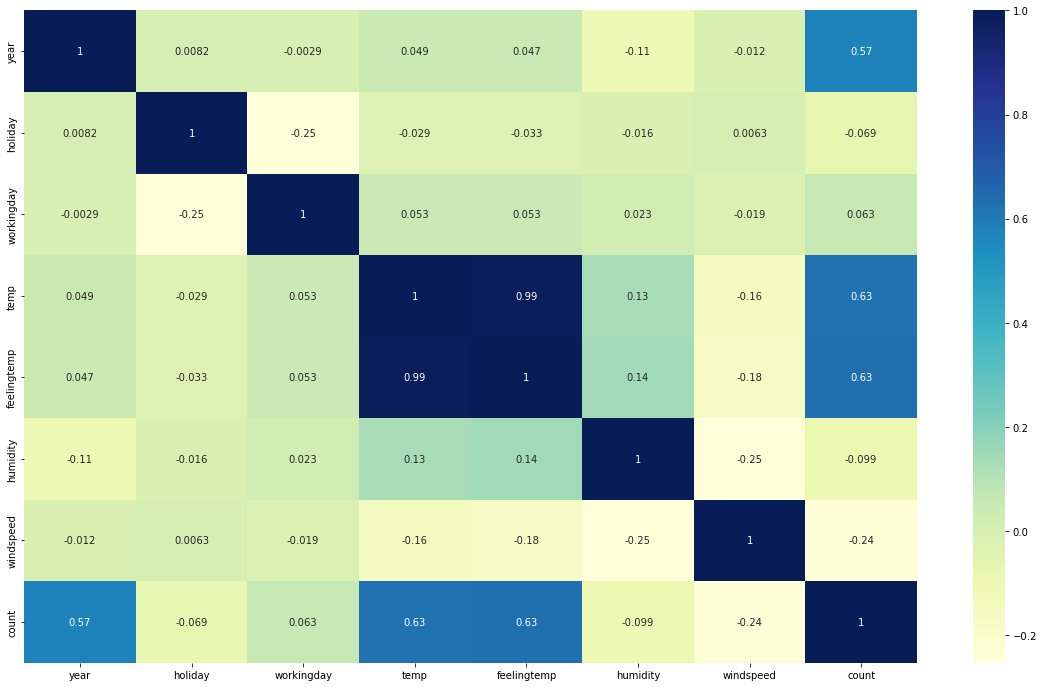

In [15]:
# Heatmap to check correlation between variables
plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(), annot = True, cmap='YlGnBu')
plt.show()

## Dummy Variables

In [16]:
# Create dummy variables for months, weekdays, weathersit, seasons

months_dummy = pd.get_dummies(df.month, drop_first = True)
seasons_dummy = pd.get_dummies(df.season, drop_first = True)
weekdays_dummy = pd.get_dummies(df.weekday, drop_first = True)
weathersit_dummy = pd.get_dummies(df.weathersit, drop_first = True)

In [17]:
# Add these dummy datasets to the original dataset
df = pd.concat([months_dummy, weekdays_dummy, weathersit_dummy, seasons_dummy, df], axis = 1)
df.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,month,holiday,weekday,workingday,weathersit,temp,feelingtemp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,...,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [18]:
# Dropping `season`, `month`, `weekday`, `weathersit` as we have created dummy variables for it
df.drop(['month', 'season', 'weekday', 'weathersit'], axis = 1, inplace = True)
df.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,summer,winter,year,holiday,workingday,temp,feelingtemp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,14.902598,17.68695,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


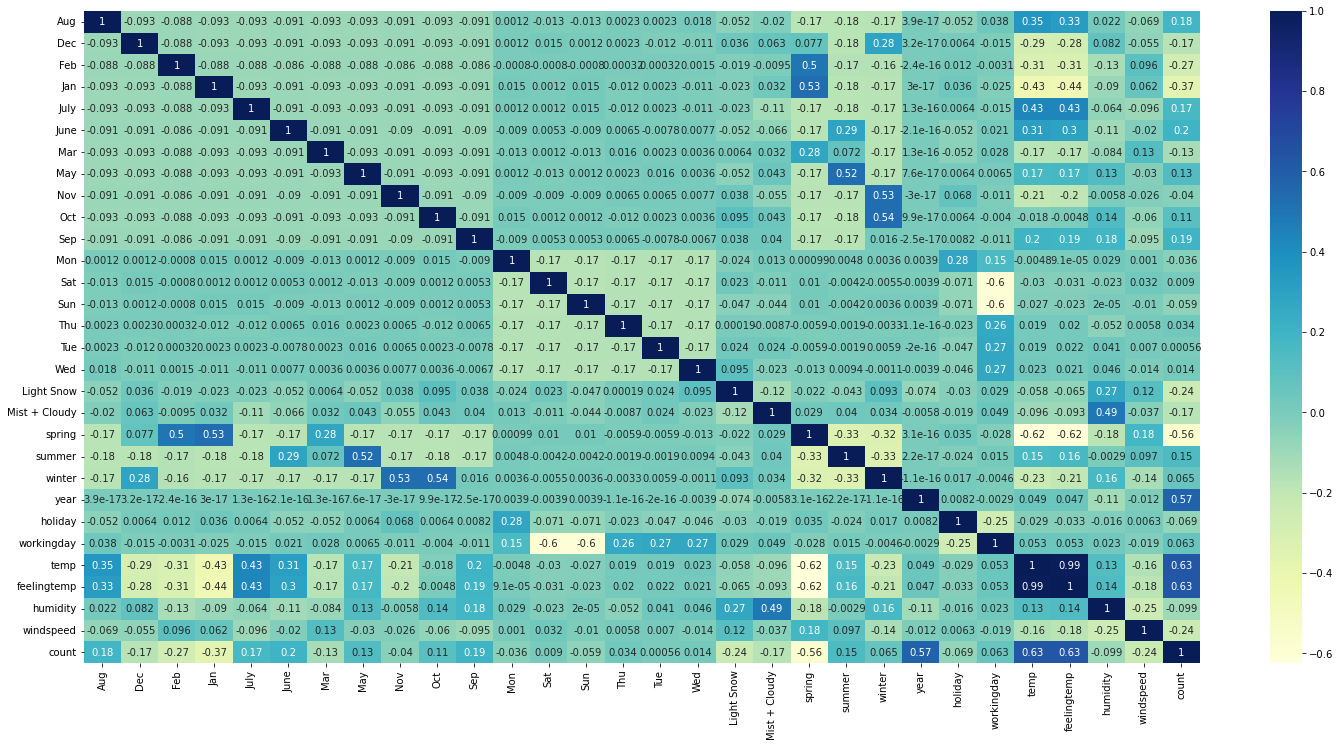

In [19]:
# Heatmap to check correlation between variables
plt.figure(figsize=(25, 12))
sns.heatmap(df.corr(), annot = True, cmap='YlGnBu')
plt.show()

In [20]:
# it is clear from the above heatmap that variables `temp` and `feelingtemp` are strongly correlated. Hence dropping
# column `feelingtemp`

df.drop(['feelingtemp'], axis = 1, inplace = True)
df.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,year,holiday,workingday,temp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,9.305237,43.6957,12.522300,1600


## Building the model into training and testing sets

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [22]:
df_train, df_test = train_test_split(df, train_size = 0.7, random_state = 100)

In [23]:
df_train.shape

(510, 29)

In [24]:
df_test.shape

(220, 29)

### Rescaling the features

In [25]:
# Instantiate an object
scaler = MinMaxScaler()

#create a list of numeric vars
num_vars = ['temp', 'humidity', 'windspeed', 'count']

# Fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,year,holiday,workingday,temp,humidity,windspeed,count
576,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0.815169,0.725633,0.264686,0.827658
426,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0.442393,0.640189,0.255342,0.465255
728,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0.245101,0.498067,0.663106,0.204096
482,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0.395666,0.504508,0.188475,0.482973
111,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0.345824,0.751824,0.380981,0.191095


In [26]:
df_train[num_vars].describe()

,temp,humidity,windspeed,count
count,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.650480,0.320883,0.513499
std,0.225858,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.538643,0.199179,0.356420
50%,0.542596,0.653714,0.296763,0.518638
75%,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000


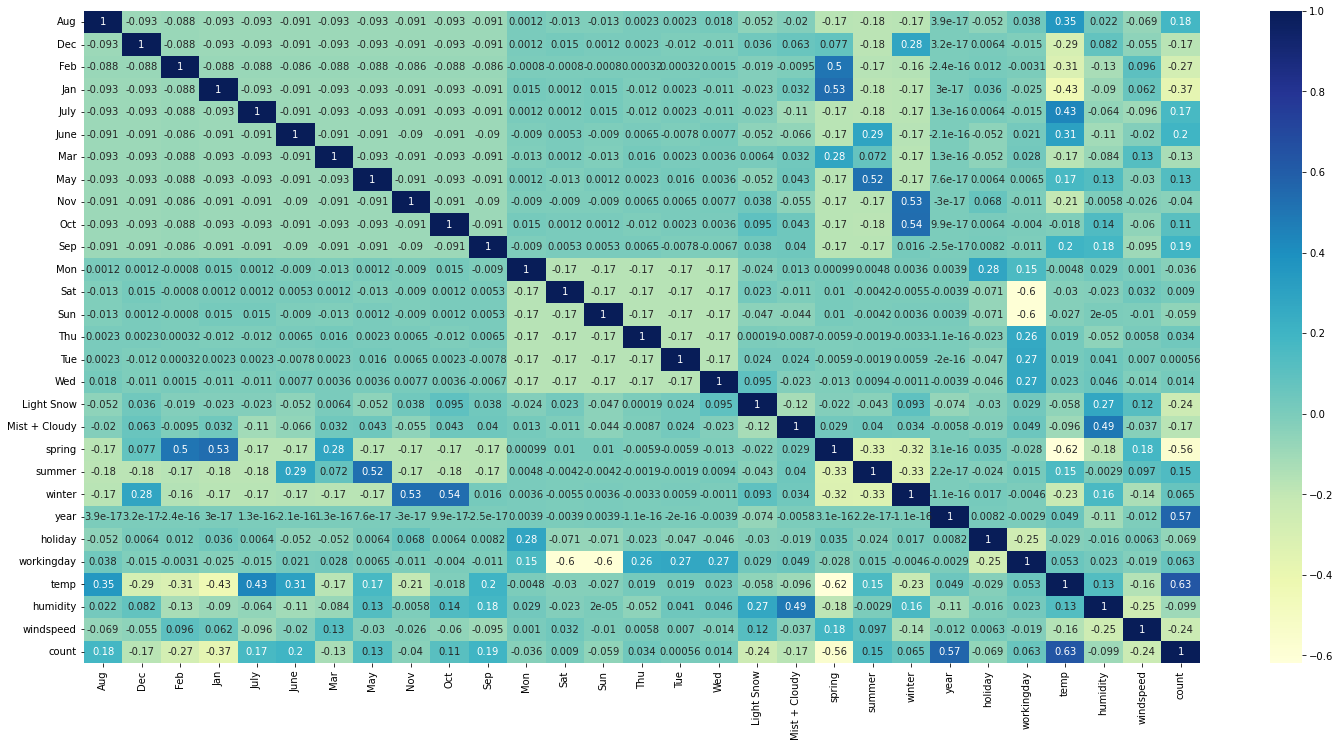

In [27]:
# Heatmap to check correlation between variables
plt.figure(figsize=(25, 12))
sns.heatmap(df.corr(), annot = True, cmap='YlGnBu')
plt.show()

In [28]:
# Dividing the tarining dataset into features and target variable
y_train = df_train.pop('count')
X_train = df_train

### Building linear regression model

In [29]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [30]:
# Running RFE with output number of variables equal to 15

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [31]:
# Variables which are selected
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Aug', False, 7),
 ('Dec', False, 3),
 ('Feb', False, 5),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 13),
 ('Mar', False, 14),
 ('May', False, 6),
 ('Nov', False, 2),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Mon', False, 8),
 ('Sat', True, 1),
 ('Sun', False, 4),
 ('Thu', False, 10),
 ('Tue', False, 9),
 ('Wed', False, 11),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1)]

In [32]:
# Features which are selected by RFE
X_train.columns[rfe.support_]

Index(['Jan', 'July', 'Sep', 'Sat', 'Light Snow', 'Mist + Cloudy', 'spring',
       'summer', 'winter', 'year', 'holiday', 'workingday', 'temp', 'humidity',
       'windspeed'],
      dtype='object')

In [33]:
# Features which are not selected by RFE
X_train.columns[~rfe.support_]

Index(['Aug', 'Dec', 'Feb', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Mon', 'Sun',
       'Thu', 'Tue', 'Wed'],
      dtype='object')

### Building model using statsmodel, for the detailed analysis

In [34]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[X_train.columns[rfe.support_]]

In [35]:
# Adding a constant variable
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

X_train_rfe.head()

,const,Jan,July,Sep,Sat,Light Snow,Mist + Cloudy,spring,summer,winter,year,holiday,workingday,temp,humidity,windspeed
576,1.0,0,1,0,0,0,0,0,0,0,1,0,1,0.815169,0.725633,0.264686
426,1.0,0,0,0,1,0,1,1,0,0,1,0,0,0.442393,0.640189,0.255342
728,1.0,0,0,0,0,0,0,1,0,0,1,0,0,0.245101,0.498067,0.663106
482,1.0,0,0,0,1,0,1,0,1,0,1,0,0,0.395666,0.504508,0.188475
111,1.0,0,0,0,0,0,1,0,1,0,0,0,1,0.345824,0.751824,0.380981


In [36]:
# Running the linear model 
lm = sm.OLS(y_train, X_train_rfe).fit()

In [37]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 06 Apr 2022   Prob (F-statistic):          4.22e-191
Time:                        00:24:05   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2519      0.036      6.969

In [38]:
# Creating a dataframe which will contain names of all the features and its corresponding VIF values
# Calculating VIF for the above model

from statsmodels.stats.outliers_influence import variance_inflation_factor

X_train_curr = X_train_rfe
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
13,humidity,29.37
12,temp,17.78
11,workingday,5.31
14,windspeed,4.73
6,spring,4.53
8,winter,3.46
7,summer,2.85
5,Mist + Cloudy,2.29
9,year,2.09
3,Sat,1.98


#### January column can be dropped as it have high p value and low VIF

In [39]:
# Dropping January
X_train_v2 = X_train_rfe.drop(["Jan"], axis = 1)

In [40]:
X_train_v2 = sm.add_constant(X_train_v2)
lm_v2 = sm.OLS(y_train, X_train_v2).fit()
print(lm_v2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 06 Apr 2022   Prob (F-statistic):          2.11e-191
Time:                        00:24:05   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2402      0.036      6.714

In [41]:
X_train_curr = X_train_v2
X_train_v2 = X_train_v2.drop(['const'], axis=1)

vif = pd.DataFrame()
vif['Features'] = X_train_v2.columns
vif['VIF'] = [variance_inflation_factor(X_train_v2.values, i) for i in range(X_train_v2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
12,humidity,28.46
11,temp,16.98
10,workingday,5.28
13,windspeed,4.72
5,spring,4.24
7,winter,3.42
6,summer,2.85
4,Mist + Cloudy,2.29
8,year,2.08
2,Sat,1.97


#### Now, all the p values are almost equal to 0, sp lets remove the feature having highest VIF i.e humidity

In [42]:
# Dropping Humidity
X_train_v3 = X_train_v2.drop(["humidity"], axis = 1)

In [43]:
X_train_v3 = sm.add_constant(X_train_v3)
lm_v3 = sm.OLS(y_train, X_train_v3).fit()
print(lm_v3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Wed, 06 Apr 2022   Prob (F-statistic):          1.28e-188
Time:                        00:24:05   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1576      0.031      5.126

In [44]:
X_train_curr = X_train_v3
X_train_v3 = X_train_v3.drop(['const'], axis=1)

vif = pd.DataFrame()
vif['Features'] = X_train_v3.columns
vif['VIF'] = [variance_inflation_factor(X_train_v3.values, i) for i in range(X_train_v3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
11,temp,6.97
10,workingday,5.20
12,windspeed,4.65
5,spring,2.49
6,summer,2.34
8,year,2.07
7,winter,1.98
2,Sat,1.96
0,July,1.58
4,Mist + Cloudy,1.57


#### Since temp has highest VIP value, we will check dropping this feature.

In [45]:
# Dropping temp
X_train_v4 = X_train_v3.drop(["temp"], axis = 1)

In [46]:
X_train_v4 = sm.add_constant(X_train_v4)
lm_v4 = sm.OLS(y_train, X_train_v4).fit()
print(lm_v4.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     137.9
Date:                Wed, 06 Apr 2022   Prob (F-statistic):          1.68e-149
Time:                        00:24:05   Log-Likelihood:                 412.53
No. Observations:                 510   AIC:                            -799.1
Df Residuals:                     497   BIC:                            -744.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5417      0.021     26.338

#### Since there is a huge drop in Adjusted R^2, it is not good idea to drop `temp` feature. Hence rolling back to v3

#### Since workingday has next highest VIP value, we will check dropping this feature.

In [47]:
# Dropping workingday
X_train_v5 = X_train_v3.drop(["workingday"], axis = 1)

In [48]:
X_train_v5 = sm.add_constant(X_train_v5)
lm_v5 = sm.OLS(y_train, X_train_v5).fit()
print(lm_v5.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.6
Date:                Wed, 06 Apr 2022   Prob (F-statistic):          1.68e-186
Time:                        00:24:05   Log-Likelihood:                 500.38
No. Observations:                 510   AIC:                            -974.8
Df Residuals:                     497   BIC:                            -919.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1960      0.030      6.628

In [49]:
X_train_curr = X_train_v5
X_train_v5 = X_train_v5.drop(['const'], axis=1)

vif = pd.DataFrame()
vif['Features'] = X_train_v5.columns
vif['VIF'] = [variance_inflation_factor(X_train_v5.values, i) for i in range(X_train_v5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
10,temp,5.12
11,windspeed,4.62
6,summer,2.23
5,spring,2.10
8,year,2.07
7,winter,1.79
0,July,1.58
4,Mist + Cloudy,1.55
1,Sep,1.34
2,Sat,1.19


#### Since Sat has next highest p value (above 0.05) and low VIF, we will check dropping this feature.

In [50]:
# Dropping Sat
X_train_v6 = X_train_v5.drop(["Sat"], axis = 1)

In [51]:
X_train_v6 = sm.add_constant(X_train_v6)
lm_v6 = sm.OLS(y_train, X_train_v6).fit()
print(lm_v6.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Wed, 06 Apr 2022   Prob (F-statistic):          5.06e-187
Time:                        00:24:06   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1994      0.030      6.746

In [52]:
X_train_curr = X_train_v6
X_train_v6 = X_train_v6.drop(['const'], axis=1)

vif = pd.DataFrame()
vif['Features'] = X_train_v6.columns
vif['VIF'] = [variance_inflation_factor(X_train_v6.values, i) for i in range(X_train_v6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
9,temp,5.09
10,windspeed,4.60
5,summer,2.23
4,spring,2.08
7,year,2.07
6,winter,1.78
0,July,1.58
3,Mist + Cloudy,1.55
1,Sep,1.34
2,Light Snow,1.08


#### Since July has next highest p value (equals 0.05) and low VIF, we will check dropping this feature.

In [53]:
# Dropping July
X_train_v7 = X_train_v6.drop(["July"], axis = 1)

In [54]:
X_train_v7 = sm.add_constant(X_train_v7)
lm_v7 = sm.OLS(y_train, X_train_v7).fit()
print(lm_v7.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Wed, 06 Apr 2022   Prob (F-statistic):          1.47e-186
Time:                        00:24:06   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1909      0.030      6.447

In [55]:
X_train_curr = X_train_v7
X_train_v7 = X_train_v7.drop(['const'], axis=1)

vif = pd.DataFrame()
vif['Features'] = X_train_v7.columns
vif['VIF'] = [variance_inflation_factor(X_train_v7.values, i) for i in range(X_train_v7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
9,windspeed,4.60
8,temp,3.84
6,year,2.07
3,spring,1.99
4,summer,1.90
5,winter,1.63
2,Mist + Cloudy,1.55
0,Sep,1.23
1,Light Snow,1.08
7,holiday,1.04


### Residual Analysis

In [56]:
y_train_pred = lm_v7.predict(X_train_curr)

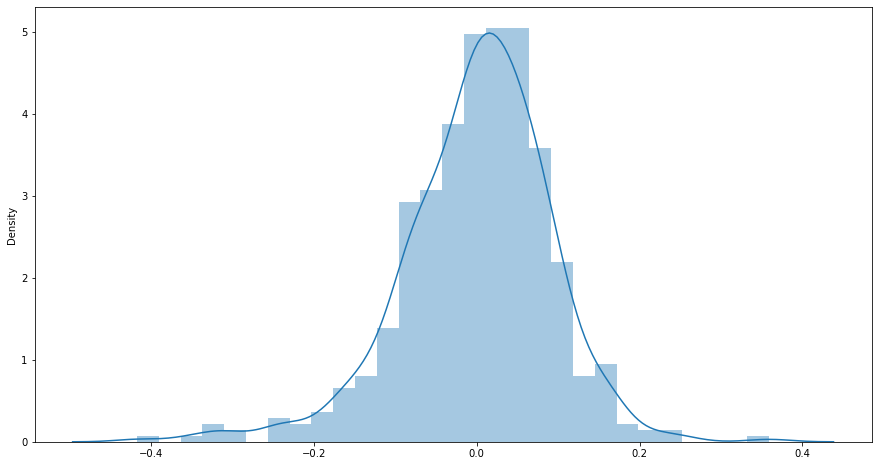

In [57]:
res = y_train - y_train_pred

plt.figure(figsize = (15, 8))
sns.distplot(res)
plt.show()

#### We can notice that the error terms are normally distributed

### Predictions and Evaluation of the test set

In [58]:
#create a list of numeric vars
num_vars = ['temp', 'humidity', 'windspeed', 'count']

# Fit on data
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,year,holiday,workingday,temp,humidity,windspeed,count
184,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0.831783,0.657364,0.084219,0.692706
535,0,0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,1,0.901354,0.610133,0.153728,0.712034
299,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0.511964,0.837699,0.334206,0.303382
221,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.881625,0.437098,0.339570,0.547400
152,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0.817246,0.314298,0.537414,0.569029


In [59]:
df_test.describe()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,year,holiday,workingday,temp,humidity,windspeed,count
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,...,0.254545,0.263636,0.236364,0.481818,0.036364,0.700000,0.558718,0.638221,0.313293,0.522154
std,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,...,0.436599,0.441609,0.425817,0.500809,0.187620,0.459303,0.233187,0.148694,0.159584,0.219163
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300


In [60]:
# Dividing the testing dataset into features and target variable
y_test = df_test.pop('count')
X_test = df_test

In [61]:
X_train_v7.columns

Index(['Sep', 'Light Snow', 'Mist + Cloudy', 'spring', 'summer', 'winter',
       'year', 'holiday', 'temp', 'windspeed'],
      dtype='object')

In [62]:
X_test_new = X_test[X_train_v7.columns]
X_test_new = sm.add_constant(X_test_new)
X_test_new.head()

,const,Sep,Light Snow,Mist + Cloudy,spring,summer,winter,year,holiday,temp,windspeed
184,1.0,0,0,1,0,0,0,0,1,0.831783,0.084219
535,1.0,0,0,0,0,1,0,1,0,0.901354,0.153728
299,1.0,0,0,1,0,0,1,0,0,0.511964,0.334206
221,1.0,0,0,0,0,0,0,0,0,0.881625,0.339570
152,1.0,0,0,0,0,1,0,0,0,0.817246,0.537414


In [63]:
# Prediction for testing data
y_test_pred = lm_v7.predict(X_test_new)

In [64]:
# Model Evaluation
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.8038195990728842

In [68]:
# Adjusted R^2
# Adj R^2 = 1-(1-R^2)*(n-1)/(n-p-1))

# n = sample size , p = number of independent variables

adj_r2 = 1-((1-0.8038195990728842)*(220-1)/(220-10-1))
print(adj_r2)

0.7944329770189553


### Equation of the best fit line is

*count = 0.0910 x Sept - 0.2850 x Light Snow - 0.0787 x Mist + Cloudy - 0.0554 x spring + 0.0621 x summer + 0.0945 x winter + 0.2341 x year - 0.0963 x holiday + 0.4777 x temp - 0.1481 x windspeed + 0.1909*